# Polynomial Regression (Plynomial Linear Regression)

### Formula : y = b0 + b1x1 + b2(x1)^2 + .... + bn(x1)^n + residual error
- here we don't have multiple variables like Multiple Linear Regression, there is just a variable
- used in case of exponential growth of dependent variable

#### Why **Linear** is used?
- The equation is combination of powered terms but we define a function to be linear or non linear on the basis of whether we are able to express the combination of parameters/coeficients(b0,b1,b2,b3) in linear way or not.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts


import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("Position_Salaries.csv")
print(df.shape)
print(df.describe())
print("Number of Nan \n", df.isnull().sum())

(10, 3)
          Level          Salary
count  10.00000       10.000000
mean    5.50000   249500.000000
std     3.02765   299373.883668
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   275000.000000
max    10.00000  1000000.000000
Number of Nan 
 Position    0
Level       0
Salary      0
dtype: int64


In [2]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In above dataset, **dependent variable** is **Salary** 

Also, feature "Position" and "Level" look one and the same as if Level is the encoded format of Position, hence we can drop Position.

In [3]:
df = df.drop(['Position'],axis=1)
df.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


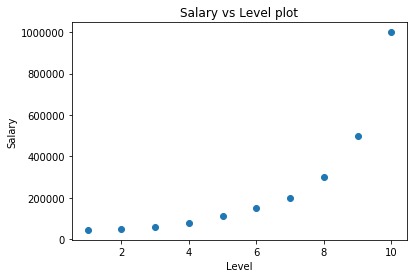

In [4]:
#visualising the data given
plt.scatter(df['Level'],df['Salary'])
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Salary vs Level plot")
plt.show()

As we can see, the data is increasing exponentialy or polynomially. Hence linear regression won't work in this case.

In [5]:
#No need to split the data into training and testing set as we don't have enough data points
#No need for feature scalling, as Linear regression library does the work for us

X = df[['Level']]
y = df['Salary']

In [6]:
#fitting Linear Regression to dataset
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
#fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

#this will create new set of polynomial features X_poly with degree n (we enter it as parameter in PolynomialFeatures)
#more the degree, it will fit more data points, lead to overfitting(look out for this)
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
#this also automatically added a column of 1's at the beginning of the dataset

In [26]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [27]:
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

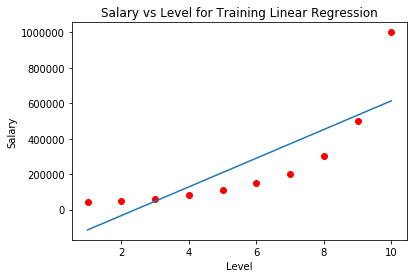

In [28]:
#Visualising the Linear Regression results
plt.scatter(X,y,color='red')
plt.plot(X,linear_regressor.predict(X))
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Salary vs Level for Training Linear Regression")
plt.show()

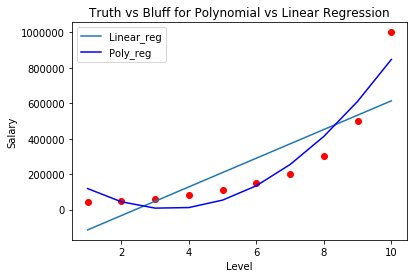

In [30]:
#Visualising the Polynomial Regression results and comparing it with linear model
plt.scatter(X,y,color='red')
plt.plot(X,linear_regressor.predict(X),label='Linear_reg')
plt.plot(X,linear_regressor_2.predict(X_poly),color='blue',label='Poly_reg')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend()
plt.title("Truth vs Bluff for Polynomial vs Linear Regression")
plt.show()

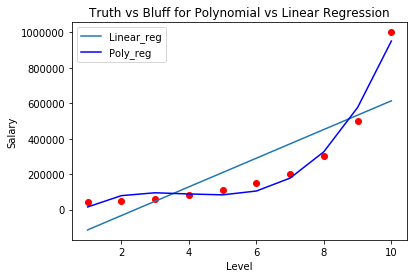

In [31]:
#fitting the data with degree=3
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)

linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X_poly,y)

plt.scatter(X,y,color='red')
plt.plot(X,linear_regressor.predict(X),label='Linear_reg')
plt.plot(X,linear_regressor_2.predict(X_poly),color='blue',label='Poly_reg')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend()
plt.title("Truth vs Bluff for Polynomial vs Linear Regression")
plt.show()

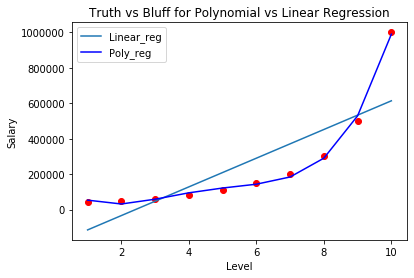

In [32]:
#fitting the data with degree=4
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)

linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X_poly,y)

plt.scatter(X,y,color='red')
plt.plot(X,linear_regressor.predict(X),label='Linear_reg')
plt.plot(X,linear_regressor_2.predict(X_poly),color='blue',label='Poly_reg')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend()
plt.title("Truth vs Bluff for Polynomial vs Linear Regression")
plt.show()

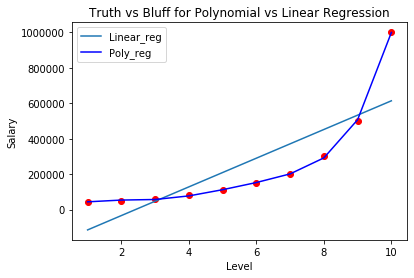

In [33]:
#fitting the data with degree=5
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X)

linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X_poly,y)

plt.scatter(X,y,color='red')
plt.plot(X,linear_regressor.predict(X),label='Linear_reg')
plt.plot(X,linear_regressor_2.predict(X_poly),color='blue',label='Poly_reg')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend()
plt.title("Truth vs Bluff for Polynomial vs Linear Regression")
plt.show()

Thus we can see that, as we increase the degree of polynomial it will fit data with more accuracy.

In [47]:
#Predicting a new result with Linear Regression
lin_pred = linear_regressor.predict([[6.5]])
print(f"Result using Linear Regression: {lin_pred}")

#Predicting a new result with Linear Regression
input_poly = poly_reg.fit_transform([[6.5]])
poly_pred = linear_regressor_2.predict(input_poly)
print(f"Result using Polynomial Regression: {poly_pred}")

Result using Linear Regression: [330378.78787879]
Result using Polynomial Regression: [174878.07765118]


#### **Thus the Polynomial Regression result is accurate.**

In [44]:
np.array([[6.5]]).shape

(1, 1)

In [37]:
y_pred = linear_regressor.predict(X)
y_pred

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

In [46]:
y_pred_2 = linear_regressor_2.predict(X_poly)
y_pred_2

array([ 43895.1048956 ,  53836.82983705,  57065.26806523,  77286.71328647,
       112263.40326306, 152736.59673623, 201349.65034936, 291571.09557096,
       506617.71561785, 998377.62237821])